# Corona infection prediction time seires model

#### The Diuresis of a person is a time-dependent parameter, for which a Time-series prediction model is used to predict Diuresis for 27th March, 2020.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel (r'Train_dataset.xlsx',sheet_name='Diuresis_TS')
df.head()

,people_ID,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00
0,1,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904
1,2,151,197.2,253.24,321.688,399.9256,492.91072,606.892864
2,3,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984
3,4,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640
4,5,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600


In [4]:
df = df.set_index('people_ID')
df.head()

,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00
people_ID,,,,,,,
1,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904
2,151,197.2,253.24,321.688,399.9256,492.91072,606.892864
3,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984
4,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640
5,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600


##### Transposing the data so as to apply the model for each date

In [5]:
df = df.T
df.head(10)

people_ID,1,2,3,4,5,6,7,8,9,10,...,22686,22687,22688,22689,22690,22691,22692,22693,22694,22695
2020-03-20 00:00:00,441.000000,151.000000,416.000000,410.00000,390.0000,389.000000,322.000000,194.000000,310.00000,242.000000,...,339.000000,241.000000,183.000000,297.000000,397.000000,134.000000,387.000000,177.000000,352.000000,181.000000
2020-03-21 00:00:00,544.200000,197.200000,515.200000,506.00000,483.0000,480.800000,401.400000,246.800000,385.00000,303.400000,...,420.800000,305.200000,232.600000,370.400000,489.400000,173.800000,479.400000,228.400000,438.400000,230.200000
2020-03-22 00:00:00,669.640000,253.240000,632.440000,621.40000,595.0000,591.160000,497.080000,310.360000,477.40000,379.480000,...,519.160000,382.840000,293.320000,459.880000,603.880000,225.160000,591.880000,288.280000,542.680000,290.440000
2020-03-23 00:00:00,821.368000,321.688000,776.728000,761.88000,730.2000,723.992000,611.096000,388.632000,589.08000,469.976000,...,639.192000,477.208000,368.184000,568.056000,742.456000,287.992000,724.856000,362.136000,665.816000,366.328000
2020-03-24 00:00:00,1002.241600,399.925600,947.773600,928.15600,892.8400,882.690400,749.015200,482.958400,720.79600,578.771200,...,780.930400,588.349600,458.420800,698.267200,906.647200,359.490400,884.627200,448.463200,814.679200,455.293600
2020-03-25 00:00:00,1215.689920,492.910720,1150.328320,1126.78720,1084.4080,1072.228480,911.818240,592.550080,877.95520,707.525440,...,950.116480,719.019520,563.104960,850.920640,1100.976640,444.388480,1074.552640,551.155840,990.615040,559.352320
2020-03-26 00:00:00,1472.627904,606.892864,1395.793984,1368.34464,1315.8896,1301.274176,1110.381888,724.860096,1069.74624,865.230528,...,1153.939776,878.223424,690.325952,1034.904768,1337.371968,549.466176,1303.263168,676.787008,1204.138048,686.622784


##### Getting the basic idea of the trend of the data

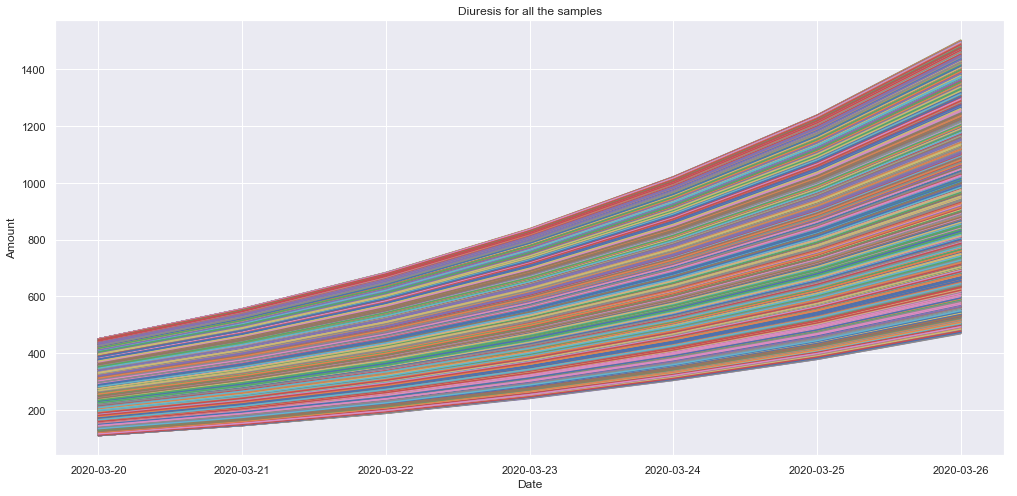

In [6]:
plt.figure(figsize=(17, 8))
plt.plot(df)
plt.title('Diuresis for all the samples')
plt.ylabel('Amount')
plt.xlabel('Date')
plt.show()

### Forecast of the diuresis value for 27th March

#### Considering the problem as multivariated time series(MTS) problem, the model used for the forecast is Vector Auto Regression (VAR).

In [7]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [8]:
#make final predictions
model = VAR(endog=df)
model_fit = model.fit()
predicted_diuresis = model_fit.forecast(model_fit.y, steps=1)
print(predicted_diuresis)

[[1783.07208321  746.03636565 1692.69077528 ...  829.88908329
  1462.69873247  841.70438631]]


In [19]:
#predicted_diuresis.shape
model_fit.y[6]

array([1472.627904,  606.892864, 1395.793984, ...,  676.787008,
       1204.138048,  686.622784])

## Model for predicting the disease probability on 27th March

In [110]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [20]:
df1 = pd.read_excel (r'Train_dataset.xlsx')
df1.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [21]:
df1.isna().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [34]:
train_df = df1
test_df = df1

In [35]:
test_df['Diuresis'] =predicted_diuresis.T
test_df['Diuresis'].head()

0    1783.072083
1     746.036366
2    1692.690775
3    1660.653566
4    1595.890302
Name: Diuresis, dtype: float64

In [37]:
train_df = train_df.drop(['people_ID', 'Designation','Name'], axis = 1) 
test_df = test_df.drop(['Designation','Name'], axis = 1) 

### Data Preprocessing

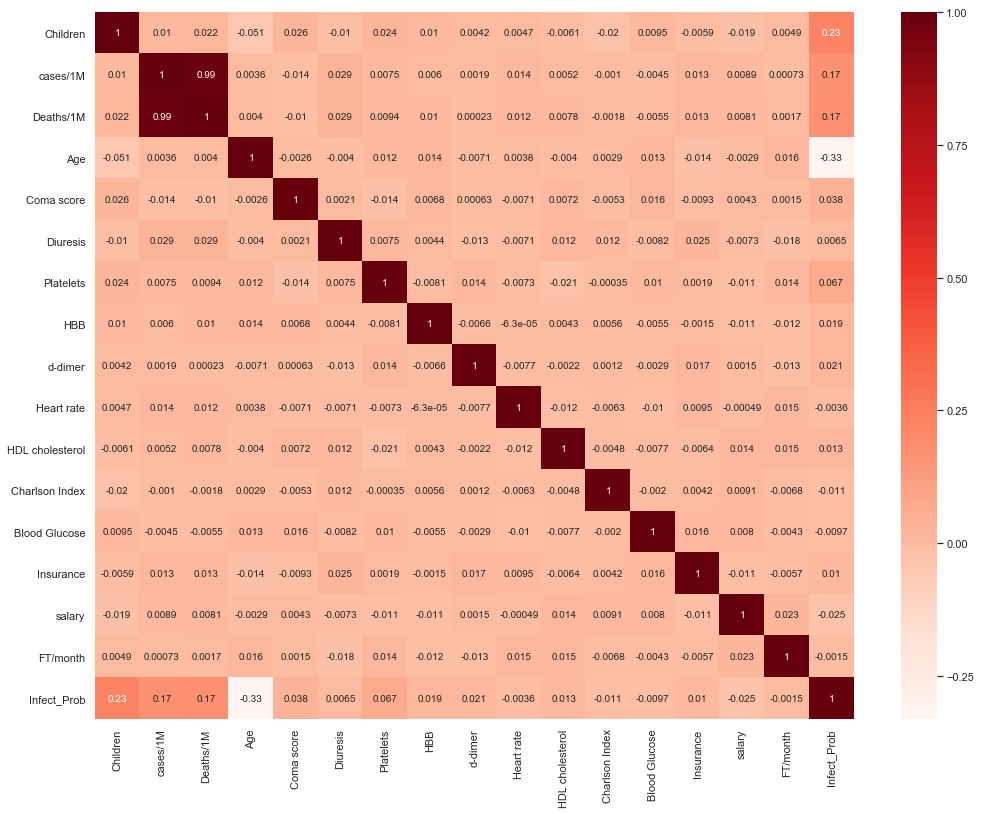

In [38]:
#Using Pearson Correlation
plt.figure(figsize=(17,13))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Since cause/1M and Deaths/1M are highly coorelated, one of them can be removed

In [39]:
train_df = train_df.drop(['cases/1M'], axis = 1) 
test_df = test_df.drop(['cases/1M'], axis = 1) 

In [40]:
train_df['Children'] = train_df['Children'].fillna(0)
train_df['Insurance'] = train_df['Insurance'].fillna(0)
train_df['FT/month'] = train_df['FT/month'].fillna(0)
train_df['Diuresis'] = train_df['Diuresis'].fillna(train_df['Diuresis'].mean())
train_df['Platelets'] = train_df['Platelets'].fillna(train_df['Platelets'].mean())
train_df['HBB'] = train_df['HBB'].fillna(train_df['HBB'].mean())
train_df['d-dimer'] = train_df['d-dimer'].fillna(train_df['d-dimer'].mean())
train_df['Heart rate'] = train_df['Heart rate'].fillna(train_df['Heart rate'].mean())
train_df['HDL cholesterol'] = train_df['HDL cholesterol'].fillna(train_df['HDL cholesterol'].mean())
test_df['Children'] = test_df['Children'].fillna(0)
test_df['Insurance'] = test_df['Insurance'].fillna(0)
test_df['FT/month'] = test_df['FT/month'].fillna(0)
test_df['Diuresis'] = test_df['Diuresis'].fillna(train_df['Diuresis'].mean())
test_df['Platelets'] = test_df['Platelets'].fillna(train_df['Platelets'].mean())
test_df['HBB'] = test_df['HBB'].fillna(train_df['HBB'].mean())
test_df['d-dimer'] = test_df['d-dimer'].fillna(train_df['d-dimer'].mean())
test_df['Heart rate'] = test_df['Heart rate'].fillna(train_df['Heart rate'].mean())
test_df['HDL cholesterol'] = test_df['HDL cholesterol'].fillna(train_df['HDL cholesterol'].mean())
train_df.isna().sum()

Region                      0
Gender                      0
Married                     0
Children                    0
Occupation                747
Mode_transport              3
Deaths/1M                   0
comorbidity               226
Age                         0
Coma score                  0
Pulmonary score             0
cardiological pressure     97
Diuresis                    0
Platelets                   0
HBB                         0
d-dimer                     0
Heart rate                  0
HDL cholesterol             0
Charlson Index              0
Blood Glucose               0
Insurance                   0
salary                      0
FT/month                    0
Infect_Prob                 0
dtype: int64

In [43]:
lb_enc = LabelEncoder()
train_df['Gender'] = lb_enc.fit_transform(train_df['Gender'])
train_df['Married'] = lb_enc.fit_transform(train_df['Married'])
test_df['Gender'] = lb_enc.fit_transform(test_df['Gender'])
test_df['Married'] = lb_enc.fit_transform(test_df['Married'])
train_df.head()

,Region,Gender,Married,Children,Occupation,Mode_transport,Deaths/1M,comorbidity,Age,Coma score,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,Bhubaneshwar,0,1,1.0,Farmer,Public,0,Hypertension,68,8,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,Bhubaneshwar,0,1,2.0,Farmer,Walk,0,Diabetes,64,15,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,Bhubaneshwar,0,0,1.0,Cleaner,Public,0,None,19,13,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,Bhubaneshwar,0,1,1.0,Driver,Car,0,Coronary Heart Disease,33,9,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,Bhubaneshwar,0,0,2.0,Manufacturing,Car,0,Diabetes,23,7,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [44]:
train_df = pd.get_dummies(train_df, columns = ['Region'] )
train_df = pd.get_dummies(train_df, columns = ['Occupation'] )
train_df = pd.get_dummies(train_df, columns = ['Mode_transport'] )
train_df = pd.get_dummies(train_df, columns = ['comorbidity'] )
train_df = pd.get_dummies(train_df, columns = ['cardiological pressure'] )
test_df = pd.get_dummies(test_df, columns = ['Region'] )
test_df = pd.get_dummies(test_df, columns = ['Occupation'] )
test_df = pd.get_dummies(test_df, columns = ['Mode_transport'] )
test_df = pd.get_dummies(test_df, columns = ['comorbidity'] )
test_df = pd.get_dummies(test_df, columns = ['cardiological pressure'] )
train_df.head()

,Gender,Married,Children,Deaths/1M,Age,Coma score,Pulmonary score,Diuresis,Platelets,HBB,...,Mode_transport_Public,Mode_transport_Walk,comorbidity_Coronary Heart Disease,comorbidity_Diabetes,comorbidity_Hypertension,comorbidity_None,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,0,1,1.0,0,68,8,<400,1783.072083,154.0,93.0,...,1,0,0,0,1,0,0,1,0,0
1,0,1,2.0,0,64,15,<100,746.036366,121.0,56.0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,1.0,0,19,13,<300,1692.690775,124.0,137.0,...,1,0,0,0,0,1,1,0,0,0
3,0,1,1.0,0,33,9,<200,1660.653566,98.0,167.0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,2.0,0,23,7,<400,1595.890302,21.0,153.0,...,0,0,0,1,0,0,0,1,0,0


In [45]:
train_df['Pulmonary score'] = train_df['Pulmonary score'].replace(regex=['^.'],value='')
train_df['Pulmonary score']=train_df['Pulmonary score'].astype(str).astype(int)
test_df['Pulmonary score'] = test_df['Pulmonary score'].replace(regex=['^.'],value='')
test_df['Pulmonary score']=test_df['Pulmonary score'].astype(str).astype(int)

In [46]:
min_max_scaler = preprocessing.MinMaxScaler()
train_df['Age'] = min_max_scaler.fit_transform(train_df['Age'].values.reshape(-1,1))
train_df['Coma score'] = min_max_scaler.fit_transform(train_df['Coma score'].values.reshape(-1,1))
train_df['Pulmonary score'] = min_max_scaler.fit_transform(train_df['Pulmonary score'].values.reshape(-1,1))
train_df['Diuresis'] = min_max_scaler.fit_transform(train_df['Diuresis'].values.reshape(-1,1))
train_df['Platelets'] = min_max_scaler.fit_transform(train_df['Platelets'].values.reshape(-1,1))
train_df['HBB'] = min_max_scaler.fit_transform(train_df['HBB'].values.reshape(-1,1))
train_df['d-dimer'] = min_max_scaler.fit_transform(train_df['d-dimer'].values.reshape(-1,1))
train_df['Heart rate'] = min_max_scaler.fit_transform(train_df['Heart rate'].values.reshape(-1,1))
train_df['HDL cholesterol'] = min_max_scaler.fit_transform(train_df['HDL cholesterol'].values.reshape(-1,1))
train_df['Charlson Index'] = min_max_scaler.fit_transform(train_df['Charlson Index'].values.reshape(-1,1))
train_df['Blood Glucose'] = min_max_scaler.fit_transform(train_df['Blood Glucose'].values.reshape(-1,1))
train_df['Insurance'] = min_max_scaler.fit_transform(train_df['Insurance'].values.reshape(-1,1))
train_df['salary'] = min_max_scaler.fit_transform(train_df['salary'].values.reshape(-1,1))
train_df['FT/month'] = min_max_scaler.fit_transform(train_df['FT/month'].values.reshape(-1,1))
train_df['FT/month'] = min_max_scaler.fit_transform(train_df['FT/month'].values.reshape(-1,1))

In [47]:
test_df['Age'] = min_max_scaler.fit_transform(test_df['Age'].values.reshape(-1,1))
test_df['Coma score'] = min_max_scaler.fit_transform(test_df['Coma score'].values.reshape(-1,1))
test_df['Pulmonary score'] = min_max_scaler.fit_transform(test_df['Pulmonary score'].values.reshape(-1,1))
test_df['Diuresis'] = min_max_scaler.fit_transform(test_df['Diuresis'].values.reshape(-1,1))
test_df['Platelets'] = min_max_scaler.fit_transform(test_df['Platelets'].values.reshape(-1,1))
test_df['HBB'] = min_max_scaler.fit_transform(test_df['HBB'].values.reshape(-1,1))
test_df['d-dimer'] = min_max_scaler.fit_transform(test_df['d-dimer'].values.reshape(-1,1))
test_df['Heart rate'] = min_max_scaler.fit_transform(test_df['Heart rate'].values.reshape(-1,1))
test_df['HDL cholesterol'] = min_max_scaler.fit_transform(test_df['HDL cholesterol'].values.reshape(-1,1))
test_df['Charlson Index'] = min_max_scaler.fit_transform(test_df['Charlson Index'].values.reshape(-1,1))
test_df['Blood Glucose'] = min_max_scaler.fit_transform(test_df['Blood Glucose'].values.reshape(-1,1))
test_df['Insurance'] = min_max_scaler.fit_transform(test_df['Insurance'].values.reshape(-1,1))
test_df['salary'] = min_max_scaler.fit_transform(test_df['salary'].values.reshape(-1,1))
test_df['FT/month'] = min_max_scaler.fit_transform(test_df['FT/month'].values.reshape(-1,1))

In [48]:
y_train = train_df['Infect_Prob']
x_train = train_df.drop(['Infect_Prob'], axis = 1)
x_test = test_df.drop(['people_ID'], axis = 1)

In [65]:
x_test= x_test.drop(['Infect_Prob'], axis=1)

#### Disease probabily prediction using Support Vector Regressor

In [66]:
from sklearn.svm import SVR

In [67]:
regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
y_pred = regressor.predict(x_test)

In [73]:
y_pred

array([49.09895351, 51.15101038, 56.87477339, ..., 47.73008321,
       53.87886921, 65.23311186])

In [74]:
output_df = pd.DataFrame(df1['people_ID'])
output_df['Infect_Prob'] = y_pred
output_df.head()

,people_ID,Infect_Prob
0,1,49.098954
1,2,51.151010
2,3,56.874773
3,4,48.729842
4,5,56.172023


In [75]:
output_df.to_excel("output_02.xlsx") 